# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())


Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [341, 223, 22]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   2320  5763    11238     767              5162          2158
1   2790  2527     5265    5612               788          1360
2  31276  1917     4469    9408              2381          4334

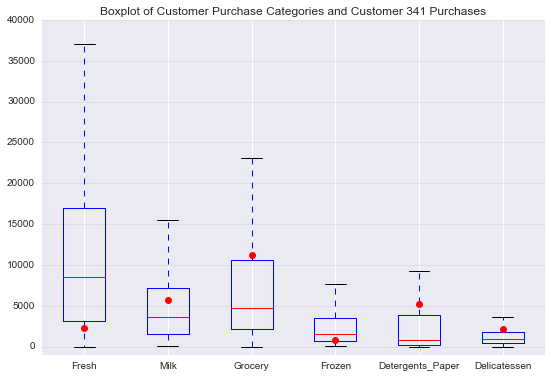

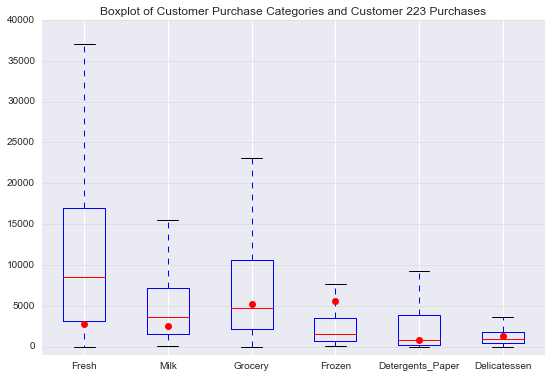

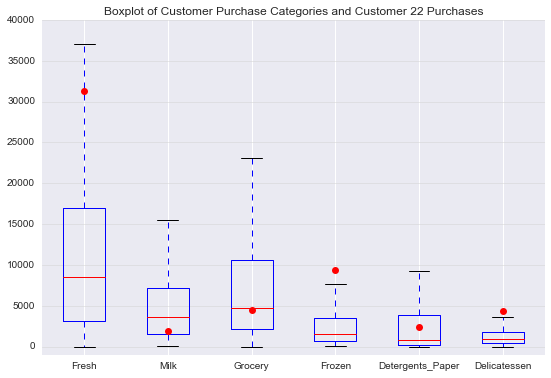

In [55]:
# Convert pandas dataframe into arrays.

fresh = np.array(data['Fresh'].values)
milk = np.array(data['Milk'].values)
grocery = np.array(data['Grocery'].values)
frozen = np.array(data['Frozen'].values)
detergents_paper = np.array(data['Detergents_Paper'].values)
delicatessen = np.array(data['Delicatessen'].values)

# combine these different collections into a list    
data_to_plot = [fresh, milk, grocery, frozen, detergents_paper, delicatessen]
labels = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Create vectors of different figure instances 
fig1 = plt.figure(1, figsize=(9, 6))
fig2 = plt.figure(2, figsize=(9, 6))
fig3 = plt.figure(3, figsize=(9, 6))
fig = [fig1, fig2, fig3]

# Create axes instances
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax3 = fig3.add_subplot(111)
ax = [ax1, ax2, ax3]

# Create boxplots
bp1 = ax1.boxplot(data_to_plot)
bp2 = ax2.boxplot(data_to_plot)
bp3 = ax3.boxplot(data_to_plot)
bp = [bp1, bp2, bp3]

for i in range(len(indices)):
    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax[i].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    # Custom x-axis labels
    ax[i].set_xticklabels(labels)
    
    # Show a portion of the y-axis
    ax[i].set_ylim([-1000, 40000])

    # Plot Sample Points
    data_x = [1, 2, 3, 4, 5, 6]
    data_y = []
    for j in range(6):
        data_y.append(data[labels[j]].values[indices[i]])    
    ax[i].plot(data_x, data_y, 'ro')
    
    # Add titles
    ax[i].set_title('Boxplot of Customer Purchase Categories and Customer %s Purchases' % indices[i])




### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The first sample customer (341) purchases 2320 monetary units of 'Fresh' items per year, which is below the first quartile for 'Fresh' (3127.75 monetary units). In addition, this customer purchases significant amounts of 'Grocery', 'Detergents_Paper', and 'Delicatessen' items, which are all above the third quartile for each category. The first sample customer purchases 2320 monetary units of 'Fresh' items per year, which is below the first quartile for 'Fresh' (3127.75 monetary units). In addition, this customer purchases significant amounts of 'Grocery', 'Detergents_Paper', and 'Delicatessen' items, which are all above the third quartile for each category. Based on the data, I believe the first customer could be a market who buys large quantities of grocery and household items.

The second sample customer (223) purchases 'Milk', 'Grocery', and 'Detergents_Paper' items that are close to the median number of items for all customers. For 'Milk', this customer purchased 2527 monetary units, which is between the first quartile (1533 monetary units) and the median (3627 monetary units). For 'Grocery', this customer purchased 5265 monetary units, which is between the first quartile (2153 monetary units) and median (3627 monetary units). For 'Detergents_Paper', this customer purchased 788 monetary units, which is between the first quartile (256 monetary units) and the median (816.5 monetary units). Based on the data, I believe this customer could be a small cafe.

The last sample customer (22) purchases a large amount of 'Fresh', 'Frozen', and 'Delicatessen' items. For 'Fresh', this customer purchases 31276 monetary units, which is higher than the third quartile (16933.75 monetary units). For 'Frozen' this customer purchases 9408 monetary units, which is higher than the third quartile (3554.25 monetary units). For 'Delicatessen' this customer purchaess 4334 monetary units, which is also higher than the third quartile (1820.25 monetary units). Since it purchases substantial amounts in these three categories, this customer could be a grocery store. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
new_y = new_data['Fresh']
dropped_new_data = new_data.drop('Fresh', axis=1)


# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(dropped_new_data,
    new_y, test_size=0.75, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, regressor.predict(X_test))

print score


-0.319086820897


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature relevant for identifying a specific customer?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict the 'fresh' feature using a decision tree regressor. The reported `R^2` score was -0.319, which means that the other features explained a little more than 30% of the variance in 'Fresh'. For this reason, this feature is still relevant for identifying specific customers and should be included in our clustering model.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

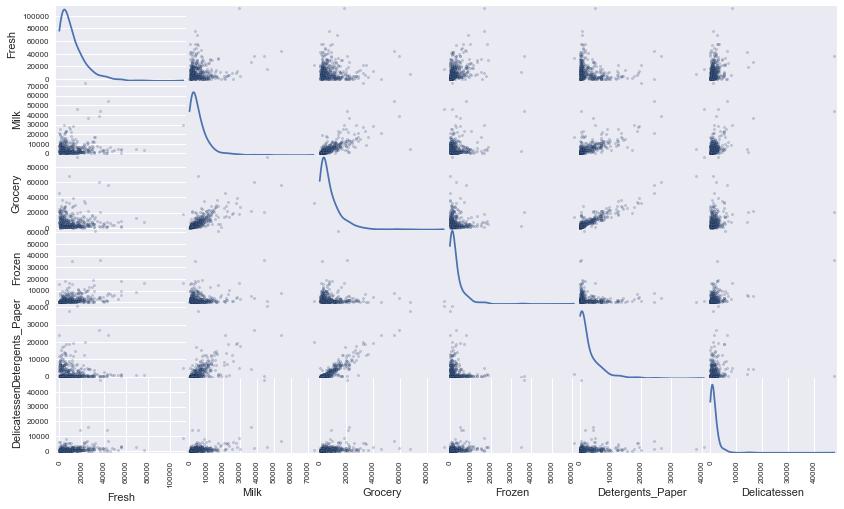

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

0.827360875515


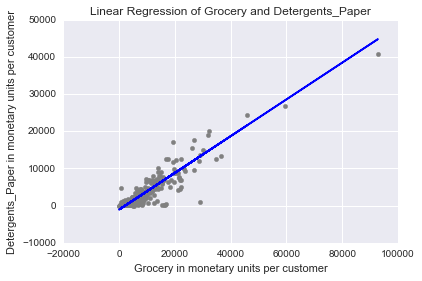

0.495611846586


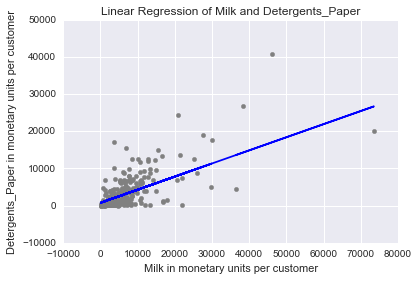

0.561936471362


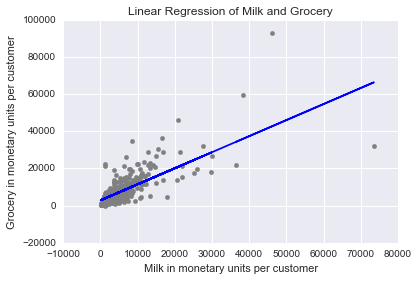

In [7]:
#Reshape the item categories into 2D arrays
reshaped_grocery = grocery.reshape(-1, 1)
reshaped_detergents_paper = detergents_paper.reshape(-1,1)
reshaped_milk = milk.reshape(-1,1)

def linear_regressor(X, y, X_string, y_string):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
        y, test_size=0.75, random_state=0)

    regressor = linear_model.LinearRegression()
    regressor.fit(X_train, y_train)


    score = r2_score(y_test, regressor.predict(X_test))

    print score

    # Plot outputs
    plt.figure()
    plt.scatter(X_test, y_test,  color='grey')
    plt.plot(X_test, regressor.predict(X_test), color='blue')
    plt.title('Linear Regression of %s and %s' % (X_string, y_string))
    plt.xlabel('%s in monetary units per customer' % X_string)
    plt.ylabel('%s in monetary units per customer' % y_string)
    plt.show()

linear_regressor(reshaped_grocery, reshaped_detergents_paper, 
                 'Grocery', 'Detergents_Paper')
linear_regressor(reshaped_milk, reshaped_detergents_paper,
                 'Milk', 'Detergents_Paper')
linear_regressor(reshaped_milk, reshaped_grocery,
                'Milk', 'Grocery')

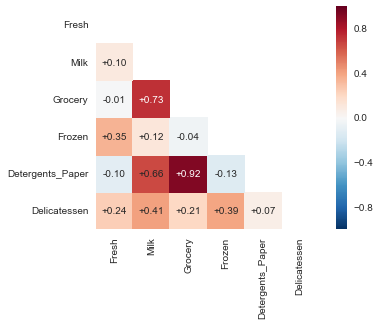

In [8]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu_r', fmt='+.2f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1202e6950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f82b9d0>]], dtype=object)

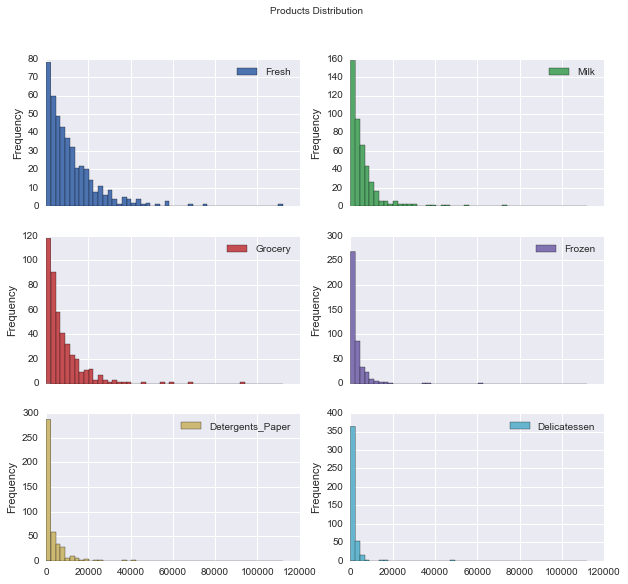

In [9]:
data.plot(kind='hist', bins=50,subplots=True,
          layout=(3,2), legend=True, figsize=(10,9),
          title='Products Distribution')

**Answer:** After implementing a linear regression model, 'Grocery' and 'Detergents_Paper' have an `R^2` score of 0.827. Since the score is close to 1, the categories are directly correlated to a strong degree. I also implemented a linear regression model to determine correlation between 'Grocery' and 'Milk', and 'Grocery' and 'Detergents_Paper' and didn't find any correlation. A look at a heatmap of the pearson correlation coefficients between categories seems to validate this observation, with the highest being 0.92 for 'Detergents_Paper' and 'Grocery'.

Since most of the features are uncorrelated with 'Fresh,' the analysis of the scatterplot matrix seems to suggest that my hypothesis that 'Fresh' is a relevant feature is correct. 

The distributions of the features are right-skewed, with the mean much larger than the median. This seems to point to a number of outliers which will make clustering less effective. An initial hypothesis that I have after looking at the distribution is that there are a few customer examples who purchase a substantial amount of every category and a majority of customer examples who buy a moderate amount from each category. The few big-spenders might account for the outliers.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

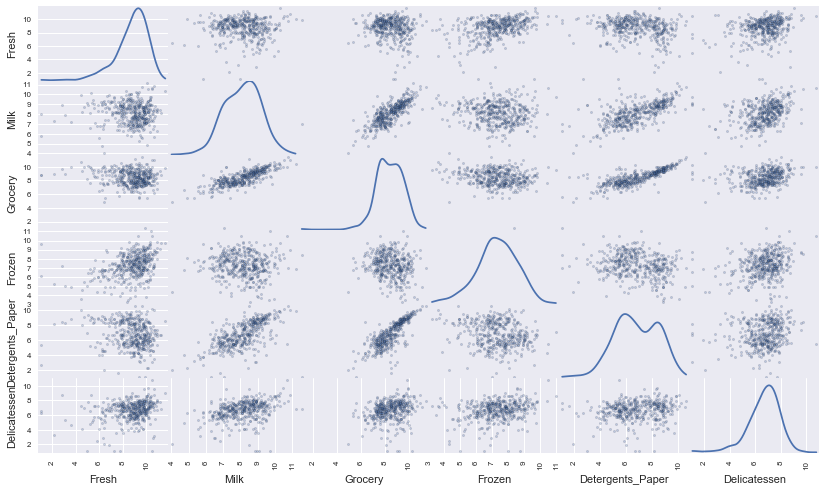

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   7.749322  8.659213  9.327056  6.642487          8.549079      7.676937
1   7.933797  7.834788  8.568836  8.632662          6.669498      7.215240
2  10.350606  7.558517  8.404920  9.149316          7.775276      8.374246

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# For each feature find the data points with extreme high or low values

outliers_list = list()

for feature in log_data.keys():
    
    feature_array = log_data[feature]
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(feature_array, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(feature_array, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    outliers_list = np.append(outliers_list, feature_outliers.index.values)

print Counter(outliers_list)
outliers = [154, 128, 65, 66, 75]
    
#Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Counter({154.0: 3, 128.0: 2, 65.0: 2, 66.0: 2, 75.0: 2, 193.0: 1, 264.0: 1, 137.0: 1, 142.0: 1, 145.0: 1, 412.0: 1, 285.0: 1, 161.0: 1, 420.0: 1, 38.0: 1, 171.0: 1, 429.0: 1, 175.0: 1, 304.0: 1, 305.0: 1, 439.0: 1, 184.0: 1, 57.0: 1, 187.0: 1, 203.0: 1, 325.0: 1, 289.0: 1, 81.0: 1, 338.0: 1, 86.0: 1, 343.0: 1, 218.0: 1, 95.0: 1, 96.0: 1, 353.0: 1, 98.0: 1, 355.0: 1, 356.0: 1, 357.0: 1, 233.0: 1, 109.0: 1, 183.0: 1})


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Data points 154, 128, 65, 66, and 75 are outliers for more than one feature under the Tukey's method. I removed those data points from the dataset, since they could affect the training of the model.

The k-means algorithm can be sensitive to outliers because it tries to optimize the sum of squares, and large deviations tend to get a lot of weight within the calculation.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. 

In the code block below, you will need to implement the following:
 - Import `sklearn.preprocessing.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430 -0.1675  0.4014   0.4381 -0.1782   
Dimension 2              0.2638  0.6859  0.1672   0.0707  0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485  0.0026 -0.7192  -0.3554  0.0331   
Dimension 6              0.0204 -0.0292  0.5402  -0.8205 -0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7514        0.1499  
Dimension 2            0.0424        0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5            0.5582        0.2092  
Dimension 6            0.1824       -0.0197  


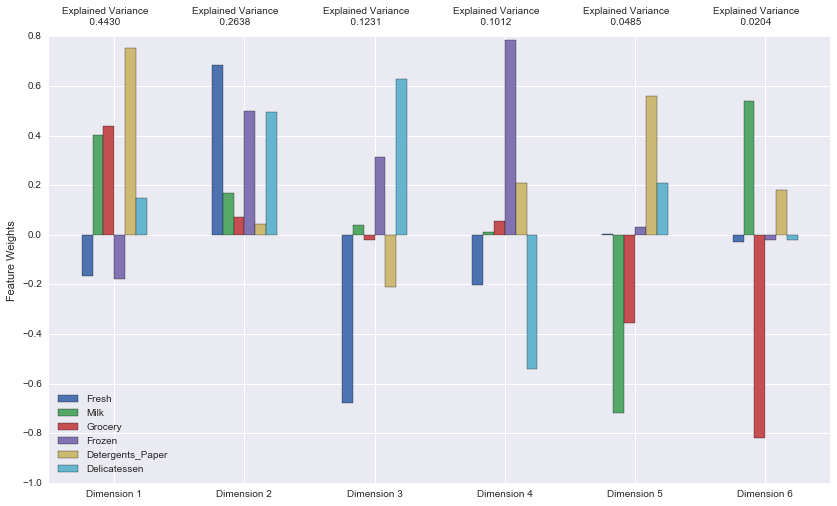

In [80]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

#TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print(pca_results)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 70.68% of the variance is explained by the first and second principal component. The first four principal components explain 93.11% of the variance. I decided that a correlation value between the feature and principal component above 0.5 or below -0.5 as significant. The first dimension (or principal component) is correlated most significantly with 'Detergents_Paper', meaning that it increases when 'Detergents_Paper' increases. This suggests that customers who purchase a large amount of detergents and paper specialize in these products.

The second principal component is meaningfully, positively correlated with the 'Fresh' and 'Frozen' features and nearly positively correlated with the 'Delicatessen' feature. This suggests that all of these features are related, so that if a customer buys a lot of 'Fresh' products, they will also purchase 'Frozen', and 'Delicatessen' products and vice versa. 

The third principal component seems to reverse this logic because it is negatively correlated with the 'Fresh' feature and positively correlated with the 'Delicatessen' feature. This implies that as one feature goes up, the other will go down. Since this explains less variance than the second dimension, it is less relevant.

The fourth principal component is significantly, postively correlated with the 'Frozen' feature and negatively correlated with the 'Delicatessen' feature. From this information we can deduce that a customer who purchases lots of frozen goods will not purchase as much imported, delicatessen goods. This makes sense, since businesses who buy lots of frozen goods will not want to buy as many perishable, expensive foods.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.3471      -0.3294       0.7258      -0.4389       0.4673   
1      -0.1832       0.2939       1.3172       0.8902       0.2503   
2       0.1419       2.7722       0.3293       0.3928       1.3904   

   Dimension 6  
0      -0.0810  
1      -0.2842  
2      -0.2012

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.3471      -0.3294
1      -0.1832       0.2939
2       0.1419       2.7722

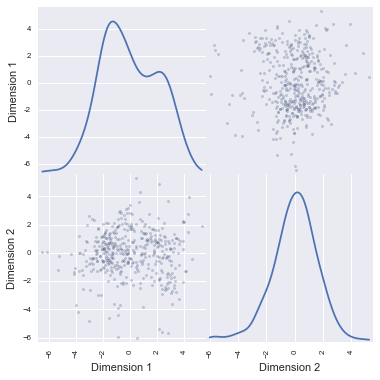

In [17]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The K-Means clustering algorithm is an unsupervised learning algorithm that works to classify a given data set through K clusters. The algorithm works in the following way: it places K points into the space spanned by the dimensions of the data, which are defined as the initial centroids. Next, it assigns each example to the group that has the closest centroid. When all the objects are assigned, the centroid is reassigned using a distance metric. This process is repeated until the centroids no longer move.

The primary advantage of the K-means clustering algorithm is that is simple and much quicker to implement when compared to the Gaussian Mixture Model. The main reason for this is that K-means assumes that each compenent has equal covariance, which decreases the amount of time required in the expectation step.

One disadvantage of the model is that it is a hill climbing algorithm, which means that the classification of clusters is dependent on where we set the initial centroids.

The Gaussian Mixture Model (GMM) is an unsupervised learning algorithm that seeks to cluster data. It assumes that all data points are generated from a mixture of a number of gaussian distributions with unknown parameters. It uses the EM algorithm to select the optimal parameters. 

The GMM has two main advantages. First, it takes into account the covariance within the data. Secondly, it assigns a probability that the point belongs to a certain cluster, instead of assigning the point to a cluster like in the K-means example.

Given the data, it seems that the GMM will work better than k-Means. Since we have a small dataset with only two components, we won't be as concerned with a decrease in computation speed using the GMM. Also, looking at our components it seems that we can't make the assumption that their covariances are equal.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.411818864386


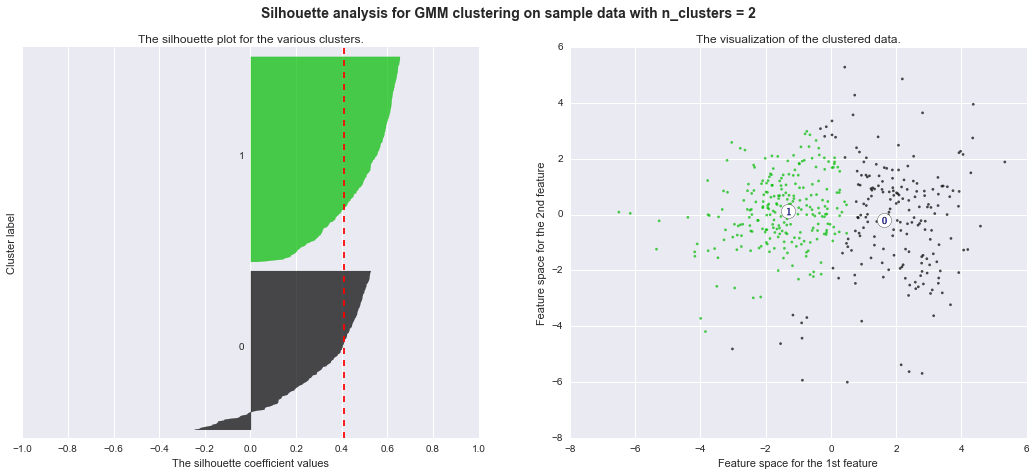

For n_clusters = 3 The average silhouette_score is : 0.376166165091


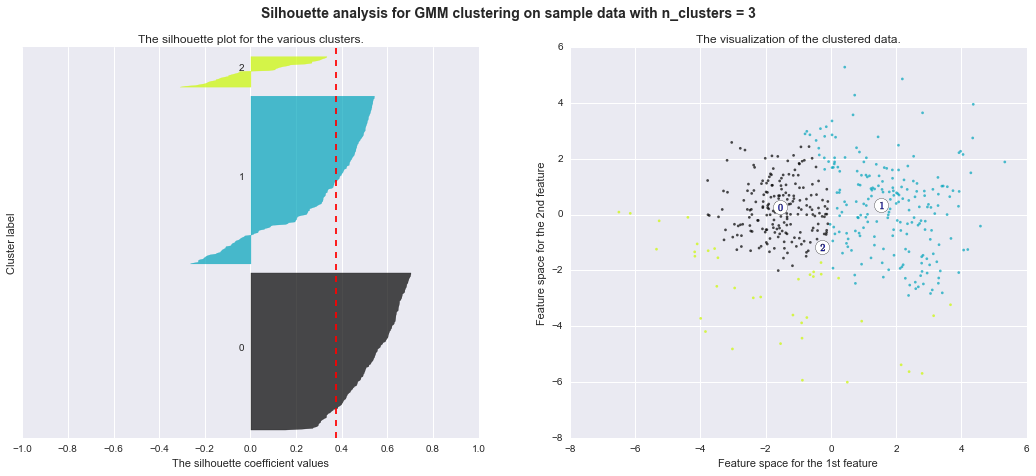

For n_clusters = 4 The average silhouette_score is : 0.332470648079


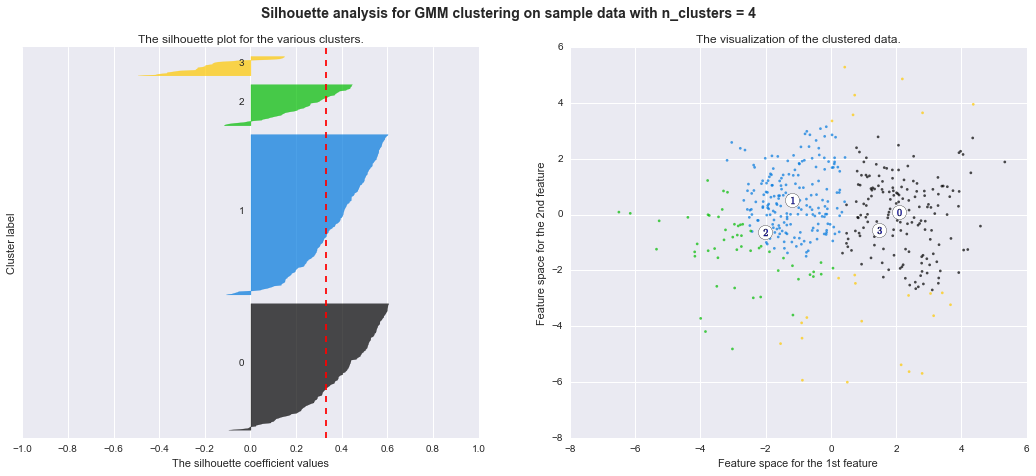

For n_clusters = 5 The average silhouette_score is : 0.277006754052


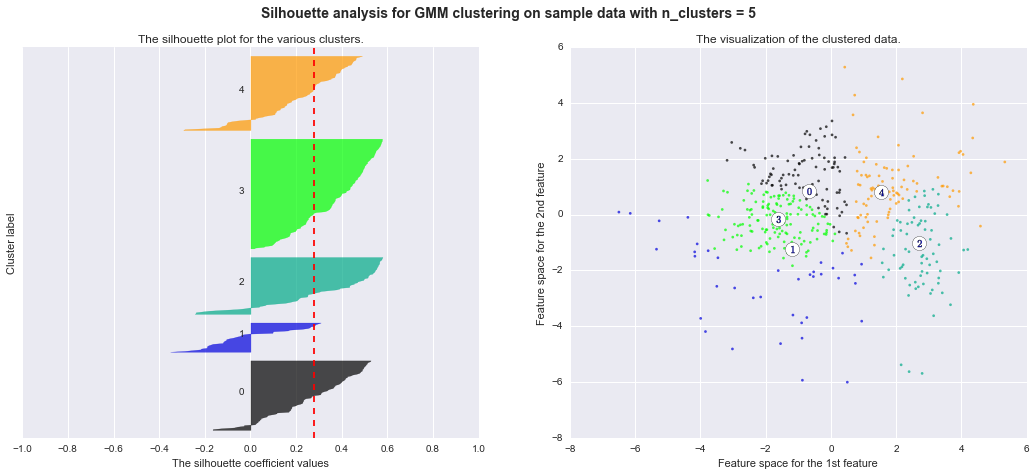

For n_clusters = 6 The average silhouette_score is : 0.28739910844


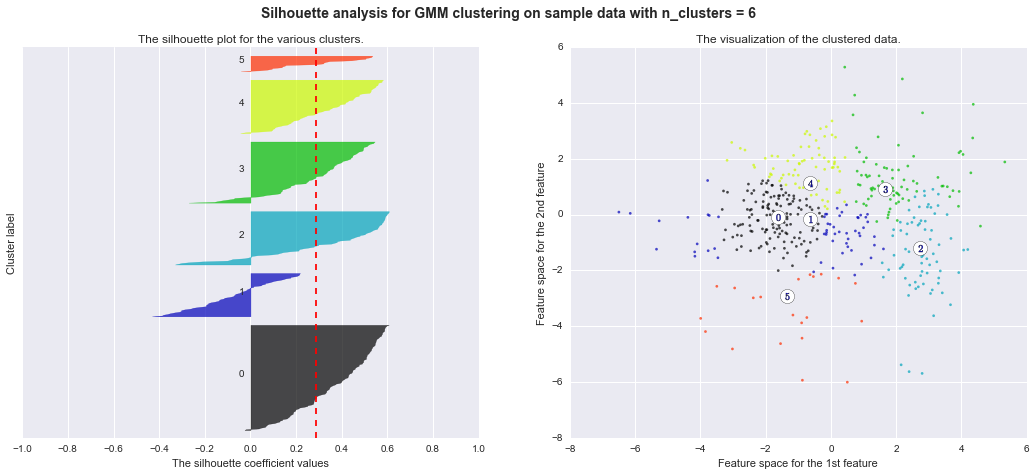

For n_clusters = 7 The average silhouette_score is : 0.325023833619


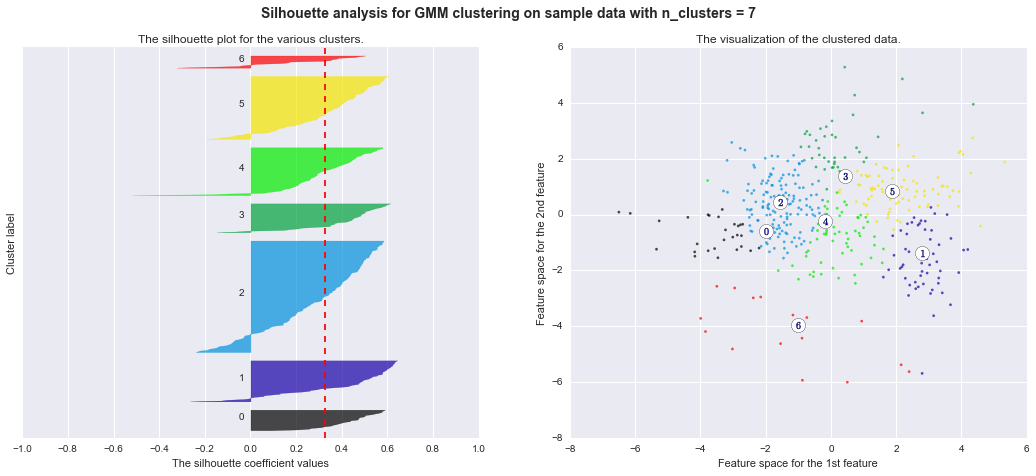

For n_clusters = 8 The average silhouette_score is : 0.296635440638


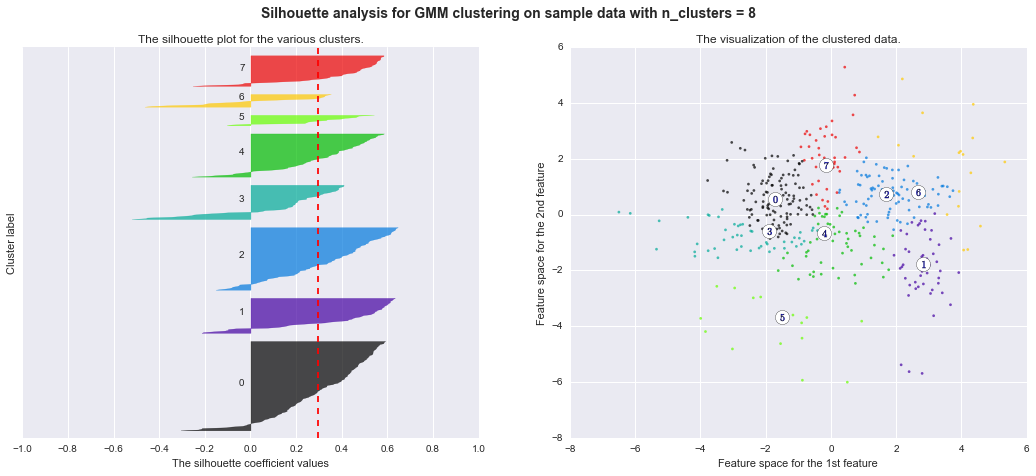

In [46]:
from __future__ import print_function

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = mixture.GMM(n_components=n_clusters, random_state=1)
    clusterer.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", score)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, preds)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(preds.astype(float) / n_clusters)
    dim1 = np.array(reduced_data['Dimension 1'])
    dim2 = np.array(reduced_data['Dimension 2'])
    ax2.scatter(dim1, dim2, marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for GMM clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I tested cluster numbers between 2 and 8. Of these, 2 clusters had the highest silhouette score with 0.4118. 3 clusters had a score of 0.3762, 4 clusters had a score of 0.3325, 5 clusters had a score of 0.2770, 6 clusters had a score of 0.2874, 7 clusters had a score of 0.3250, and 8 clusters had a score of 0.2966. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

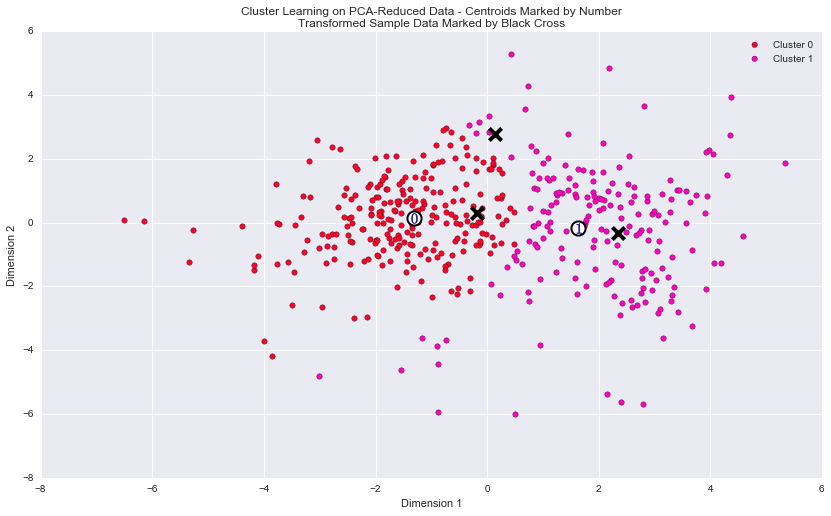

In [47]:
clusterer = mixture.GMM(n_components=2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [48]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8812.0  2052.0   2689.0  2058.0             337.0         712.0
Segment 1  4316.0  6347.0   9555.0  1036.0            3046.0         945.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

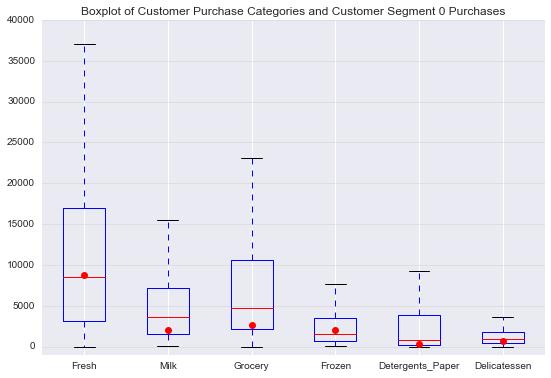

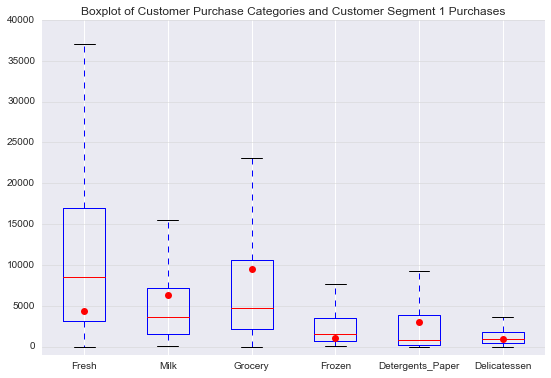

In [54]:
# Create vectors of different figure instances 
fig4 = plt.figure(4, figsize=(9, 6))
fig5 = plt.figure(5, figsize=(9,6))
center_fig = [fig4, fig5]

# Create axes instances
ax4 = fig4.add_subplot(111)
ax5 = fig5.add_subplot(111)
ax_fig = [ax4, ax5]

# Create boxplots
bp4 = ax4.boxplot(data_to_plot)
bp5 = ax5.boxplot(data_to_plot)
bp_fig = [bp4, bp5]

for i in range(len(true_centers)):
    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax_fig[i].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax_fig[i].set_ylim([-1000, 40000])

    # Custom x-axis labels
    ax_fig[i].set_xticklabels(labels)

    # Plot Sample Points
    data_x = [1, 2, 3, 4, 5, 6]
    data_y = []
    for j in range(6):
        data_y.append(true_centers[labels[j]].values[i])    
    ax_fig[i].plot(data_x, data_y, 'ro')
    
    # Add titles
    ax_fig[i].set_title('Boxplot of Customer Purchase Categories and Customer %s Purchases' % segments[i])

**Answer:** The mean centroid for customer segment 0 has customer categories 'Milk', 'Grocery', and 'Detergents_Paper' that fall between the median and third quartile. For example, the customer purchases 6347 monetary units of 'Milk,' which falls between the median (3627 monetary units) and third quartile (7190 monetary units). 'Delicatessen' purchases (945 monetary units) fall between the first quartile (408.25 monetary units) and the median (965.5 monetary units). 'Frozen' and 'Fresh' also follow this trend.

The mean centroid for customer segment 1 has three customer categories that are near their respective medians. Customer segment 1 purchases 8812 monetary units from the 'Fresh' category, while the median for 'Fresh' is 8504 monetary units. 'Frozen' and 'Detergents_Paper' are also similar between the value of customer segment 1 and the medians of the data. 'Milk', 'Grocery', and 'Delicatessen' are both between the first quartile and the median.

Based on these values, I believe that customer segment 0 represents grocery stores whereas customer segment 1 represents small businesses, cafes and restaurants. Customer segment 0 has larger values for several categories, implying that they need a larger volume of products. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [77]:

# Display the samples
d = np.zeros((3,2))
for i in range(3):
    for j in range(2):
        d[i][j] = spatial.distance.cdist(np.array(samples.iloc[[i]]), np.array(true_centers.iloc[[j]]), 'canberra')
        print ('Customer %s is %s distance from Customer Segment %s' 
               % (indices[i], d[i][j], j))



#Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Customer 341 is 3.51013943746 distance from Customer Segment 0
Customer 341 is 1.22785398992 distance from Customer Segment 1
Customer 223 is 2.12363904397 distance from Customer Segment 0
Customer 223 is 2.39200457756 distance from Customer Segment 1
Customer 22 is 2.95389907328 distance from Customer Segment 0
Customer 22 is 3.22231931066 distance from Customer Segment 1
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


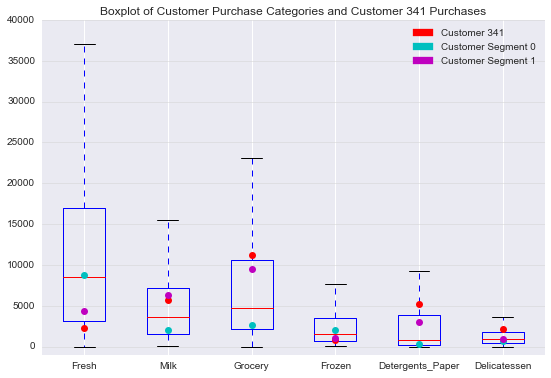

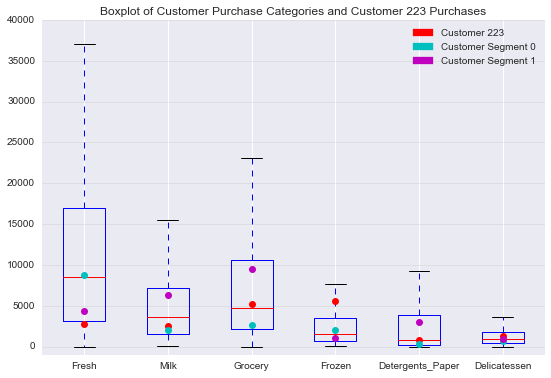

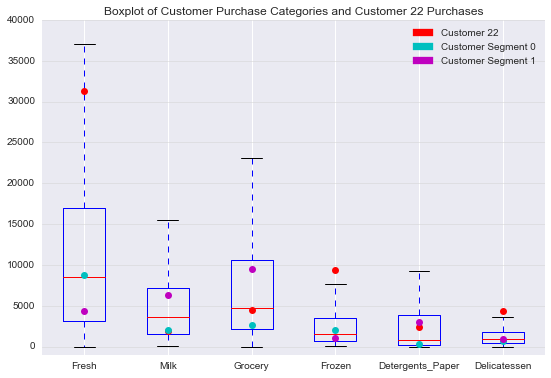

In [62]:
import matplotlib.patches as mpatches

# Convert pandas dataframe into arrays.

fresh = np.array(data['Fresh'].values)
milk = np.array(data['Milk'].values)
grocery = np.array(data['Grocery'].values)
frozen = np.array(data['Frozen'].values)
detergents_paper = np.array(data['Detergents_Paper'].values)
delicatessen = np.array(data['Delicatessen'].values)

# combine these different collections into a list    
data_to_plot = [fresh, milk, grocery, frozen, detergents_paper, delicatessen]
labels = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Create vectors of different figure instances 
fig1 = plt.figure(1, figsize=(9, 6))
fig2 = plt.figure(2, figsize=(9, 6))
fig3 = plt.figure(3, figsize=(9, 6))
fig = [fig1, fig2, fig3]

# Create axes instances
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax3 = fig3.add_subplot(111)
ax = [ax1, ax2, ax3]

# Create boxplots
bp1 = ax1.boxplot(data_to_plot)
bp2 = ax2.boxplot(data_to_plot)
bp3 = ax3.boxplot(data_to_plot)
bp = [bp1, bp2, bp3]

for i in range(len(indices)):
    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax[i].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    # Custom x-axis labels
    ax[i].set_xticklabels(labels)
    
    # Show a portion of the y-axis
    ax[i].set_ylim([-1000, 40000])

    # Plot Sample Points
    data_x = [1, 2, 3, 4, 5, 6]
    data_y = []
    for j in range(6):
        data_y.append(data[labels[j]].values[indices[i]])    
    ax[i].plot(data_x, data_y, 'ro')
    
    #Plot Customer Segment 0
    data_x = [1, 2, 3, 4, 5, 6]
    data_y0 = []
    for j in range(6):
        data_y0.append(true_centers[labels[j]].values[0])    
    ax[i].plot(data_x, data_y0, 'co')
    
    #Plot Customer Segment 1
    data_y1 = []
    for j in range(6):
        data_y1.append(true_centers[labels[j]].values[1])    
    ax[i].plot(data_x, data_y1, 'mo')
    
    # Add titles
    ax[i].set_title('Boxplot of Customer Purchase Categories and Customer %s Purchases' % indices[i])
    
    # Add legend
    r_patch = mpatches.Patch(color='r', label='Customer %s' % indices[i])
    c_patch = mpatches.Patch(color='c', label='Customer Segment 0')
    m_patch = mpatches.Patch(color='m', label='Customer Segment 1')
    ax[i].legend(handles=[r_patch, c_patch, m_patch])
    


**Answer:** 
I decided to use a [Canberra Distance](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) to compare the values of each category of the samples and customer segment 0 and 1. I used the Canberra distance in order to get a weighted distance, so that each category had equal weight within the calculation. Based on the results, Customer 341 is closer to Customer Segment 1 (1.228) compared to Customer Segement 0 (3.510), Customer 223 is closer to Customer Segment 0 (2.124) compared to Customer Segment 1 (2.392) and Customer 22 is closer to Customer Segment 0 (2.954) than Customer Segment 1 (3.223). 

A comparison of the spending categories for each sample customer and customer segment seem to validate this claim. Customer 341 is closer in spending to Customer Segment 1 in all six categories. Customer 223 is closer in spending to Customer Segment 0 in four categories ('Milk', 'Grocery', 'Frozen', and 'Detergents_Paper'), and is closer to Customer Segment 1 in two categories ('Fresh', 'Delicatessen'). Customer 22 is closer in spending to Customer Segment 0 in four categories ('Fresh', 'Milk', 'Grocery', and 'Frozen') and is closer to Customer Segment 1 in two categories ('Detergents_Paper', 'Delicatessen').

Therefore, my prediction is that Customer 341 is in customer segment 1, and Customer 223 and Customer 22 are in customer segment 0.

The model predicts that Customer 341 and 22 are in customer segment 1, while Customer 223 is in customer segment 0. My prediction for Customer 22 was different from the model's prediction. 

This can be explained by the choice to reduce dimensionality using the first and second principal components. For both 'Detergents_Paper' and 'Delicatessen', Customer 22 is closer in spending to Customer Segment 1. Since the first principal component is substantially positively correlated with 'Detergents_Paper' (0.7514) and the second principal component is nearly positively correlated with 'Delicatessen' (0.4941), the model places more emphasis on those two categories and as a result predicted that Customer 22 belongs to customer segment 1.



## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** An A/B test is used by companies to test a small change that a company is considering making on customers before making that change. A subset of similar customers are selected, split into A and B groups, and the small change is implemented on one of the sets in the customers. The results are then noted.

This change would affect customers in segment 0 more, since they purchase more 'Fresh' products on average than customers in segment 1. Since they produce more 'Fresh' products, they will potentially be more affected by changes in delivery services. My suggestion is to use A/B testing on a subset of customers from segment 0 for this reason.

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:** The wholesale distributor could use the data to assist a supervised learning analysis by using the two clusters as a separate feature in addition to using just the six original features. This would be less computationally expensive, since the data would be trained using just one feature instead of six. Based on the underlying distribution below, it seems that the clustering misclassified several examples so it wouldn't be a good idea to use the two clusters as the only feature in a supervised learning task.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

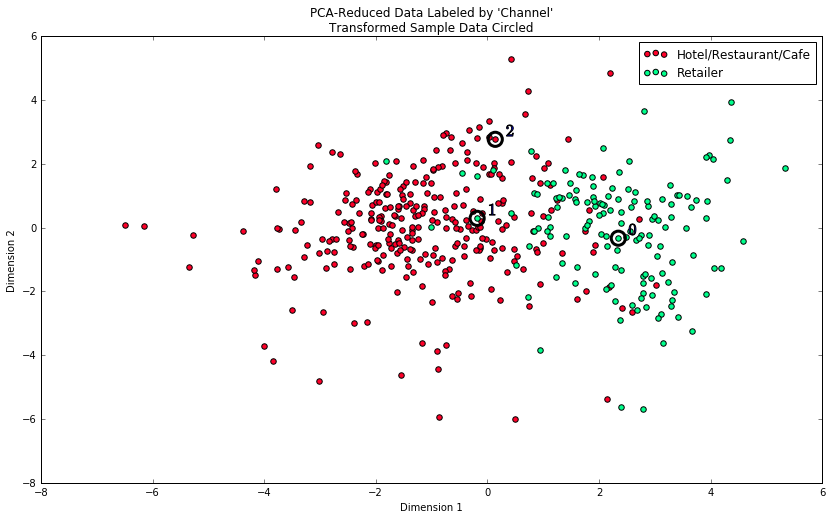

In [150]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm and number of clusters fits the underlying distribution of Hotel/Resturant/Cafe and Retailer customers well. We selected two clusters, which match the Hotel/Resturant/Cafe and Retailer lables. Using this distribution, it is unclear whether any customer segments are purely 'Retailer' or 'Hotels/Resturants/Cafes,' since the customers are still relatively mixed between the two. This classification is not consistent with my previous definition, since I believed that Segment 1 contained restaurants/cafes, whereas I beleived Segment 0 contained grocery stores, which would be retail establishments. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.